<a href="https://colab.research.google.com/github/juan-medinaf/Datathon5_CHL5230_Group5/blob/main/Datathon5_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
import statistics
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import io
from collections import deque

In [2]:
from google.colab import files
imported= files.upload()

Saving mhealth.csv to mhealth.csv


In [3]:
data= pd.read_csv(io.BytesIO(imported['mhealth.csv']))

In [4]:
df= data.copy()

Data Exploration

In [5]:
# Getting the shape of the dataframe
print(df.shape)

(999999, 14)


In [6]:
# List the columns of the dataframe
print(df.columns)

Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'subject'],
      dtype='object')


In [7]:
# summary
description = df.describe()
description

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.00000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
mean,1.473954,-9.618162,-0.944714,-0.023928,-0.616830,-0.131466,-3.578801,-5.72591,2.645165,-0.293943,-0.450610,0.283440,1.702181
std,3.751845,4.076683,5.333969,0.495758,0.354135,0.547774,4.770602,5.70559,3.897641,0.528506,0.564118,0.558707,3.250841
min,-22.146000,-19.619000,-19.373000,-2.146600,-7.789900,-2.567800,-22.361000,-18.97200,-18.239000,-8.339200,-3.570800,-2.689700,0.000000
25%,0.115100,-10.116000,-2.662400,-0.454550,-0.816140,-0.561890,-5.984100,-9.36790,0.406120,-0.711760,-0.882960,-0.211210,0.000000
50%,1.336800,-9.644800,-0.016372,-0.070501,-0.703560,-0.137520,-2.859700,-7.35990,2.231200,-0.372550,-0.622180,0.325430,0.000000
75%,2.586900,-9.034300,1.371500,0.426720,-0.542210,0.345780,-1.021200,-2.45280,5.201200,0.049020,-0.080082,0.786640,2.000000
max,20.054000,21.161000,25.015000,60.484000,2.011300,2.770100,19.864000,22.19100,25.741000,3.319600,1.556500,2.750000,12.000000


In [8]:
print(df.columns)

Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'subject'],
      dtype='object')


In [9]:

dtypes = df.dtypes
print(dtypes)


alx         float64
aly         float64
alz         float64
glx         float64
gly         float64
glz         float64
arx         float64
ary         float64
arz         float64
grx         float64
gry         float64
grz         float64
Activity      int64
subject      object
dtype: object


In [10]:
#No missing values
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [11]:
# Group the dataset by the 'subject' column and apply the `len` function
# to each group. This counts the number of records for each subject.
# The result is a series where the index is 'subject' and the value is the count of records.
subjects_records = (df.groupby('subject').apply(len) >= 2)

# Filter the original dataset to include only those patients who have 2 or more records.
# This is done by first creating a boolean series `patients_with_2_or_more_records` where the index is 'patient_nbr'
# and the value is True if the patient has 2 or more records, False otherwise.
# Then, using `isin` method to filter `df` so that it only includes rows where 'subject'
# matches those in the `subject_records` series that are True.
grouped_df = df[df['subject'].isin(subjects_records[subjects_records].index)]

In [12]:
print(grouped_df.columns)

Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'subject'],
      dtype='object')


Visualization

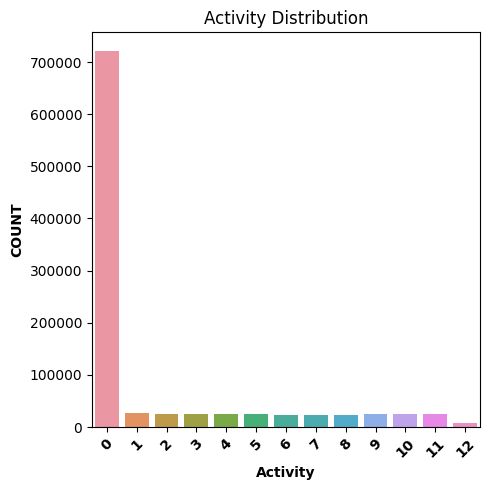

In [13]:
#activity
# New color palette
new_colors = ["#eaac8b", "#e56b6f", "#b56576", "#6d597a", "#355070"]  # A more varied color palette
sns.set_palette(sns.color_palette(new_colors))

# Race Distribution with updated color palette
plt.figure(figsize=(5, 5))
sns.countplot(x='Activity', data=df)
plt.title('Activity Distribution')
plt.xlabel('Activity', fontweight='bold')
plt.ylabel('COUNT', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
updated_activity_distribution_fig = plt.gcf()
plt.show()

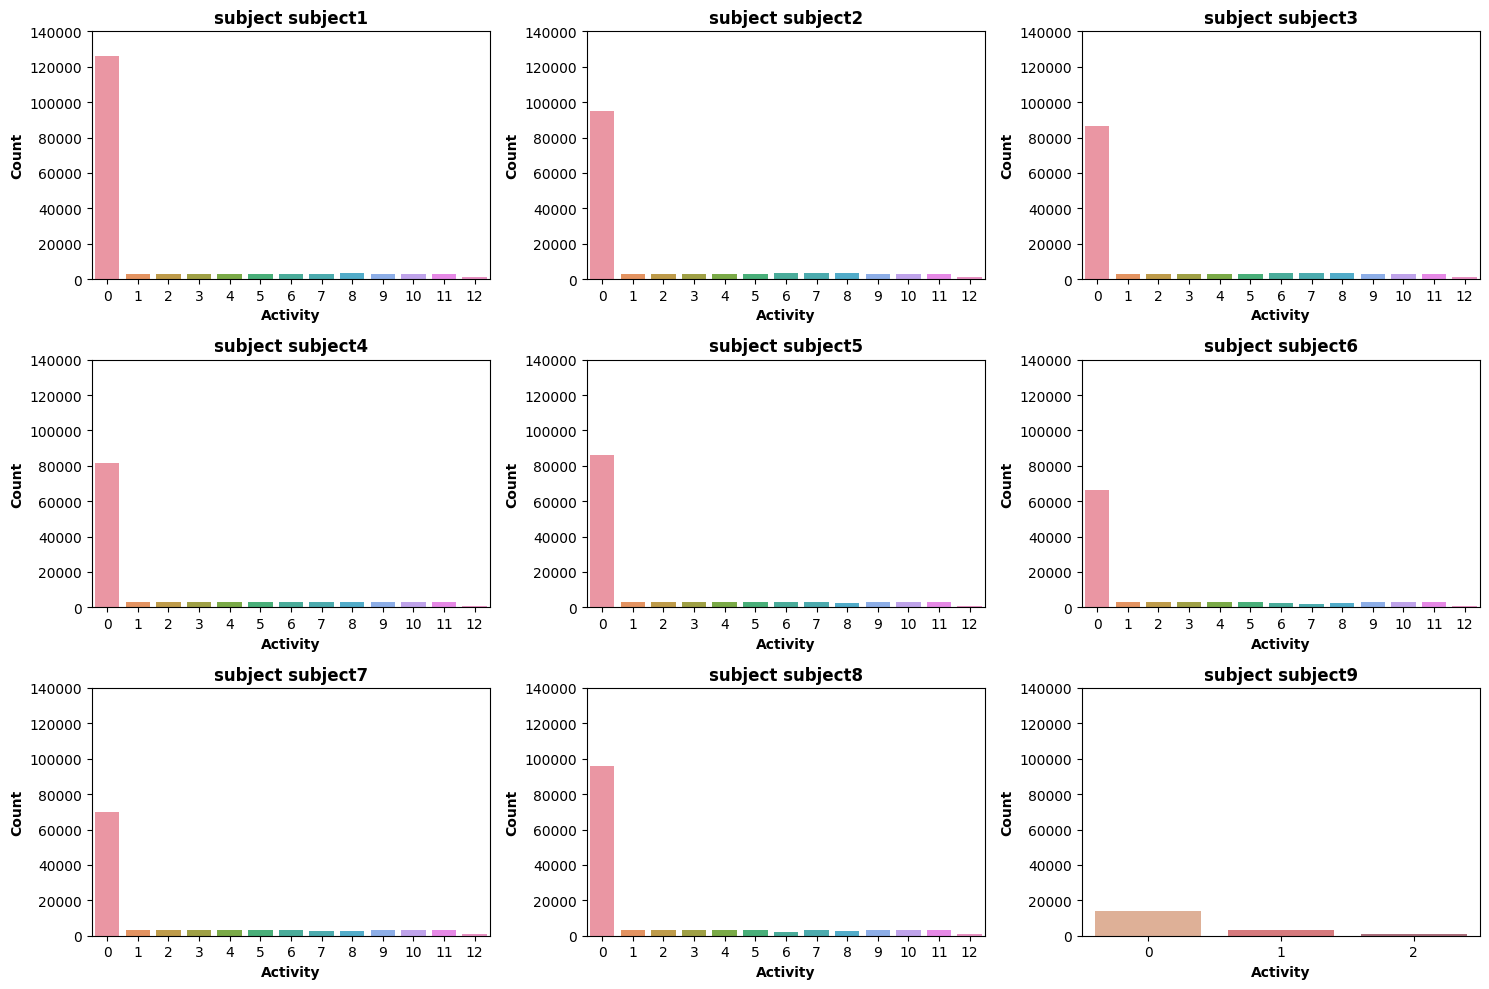

In [14]:
# Activity by Subject in the grouped dataframe
# Create a bar plot for each subject
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

# Assuming sample_df is a DataFrame with 'Subject', 'Activity', and other relevant columns
subjects = grouped_df['subject'].unique()

for i, subject in enumerate(subjects, start=1):
    plt.subplot(3, 3, i)  # Adjust the number of rows and columns based on the number of subjects
    subset = grouped_df[grouped_df['subject'] == subject]
    sns.countplot(x='Activity', data=subset)
    plt.title(f'subject {subject}', fontweight='bold')
    plt.xlabel('Activity', fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    plt.ylim(0, 140000)  # Set a common y-axis limit

plt.tight_layout()
plt.show()

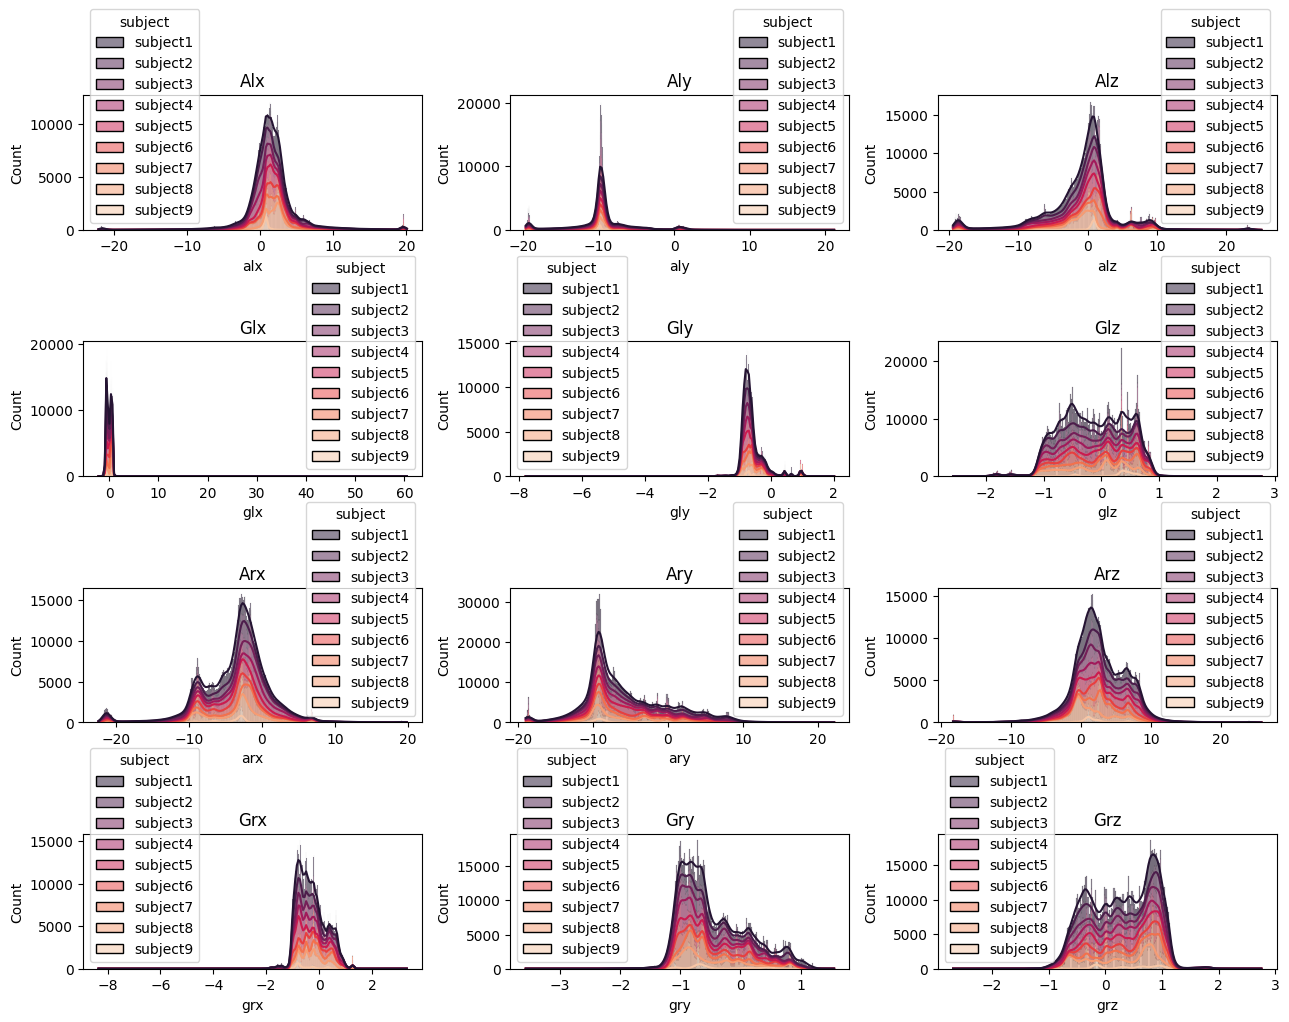

In [15]:
 #distribution of each signal by subject
 signal_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz']

# Create a grid of subplots with 3 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(13, 10))

# Loop over each selected feature to create a subplot for each
for i, column in enumerate(signal_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'readmitted' class
    sns.histplot(df, x=column, hue='subject', kde=True, palette='rocket', ax=axs[x][y],
                 multiple='stack')
    axs[x][y].set_title(column.replace('_', ' ').title())

# Adjust the layout and display all the subplots
plt.tight_layout()
plt.show()


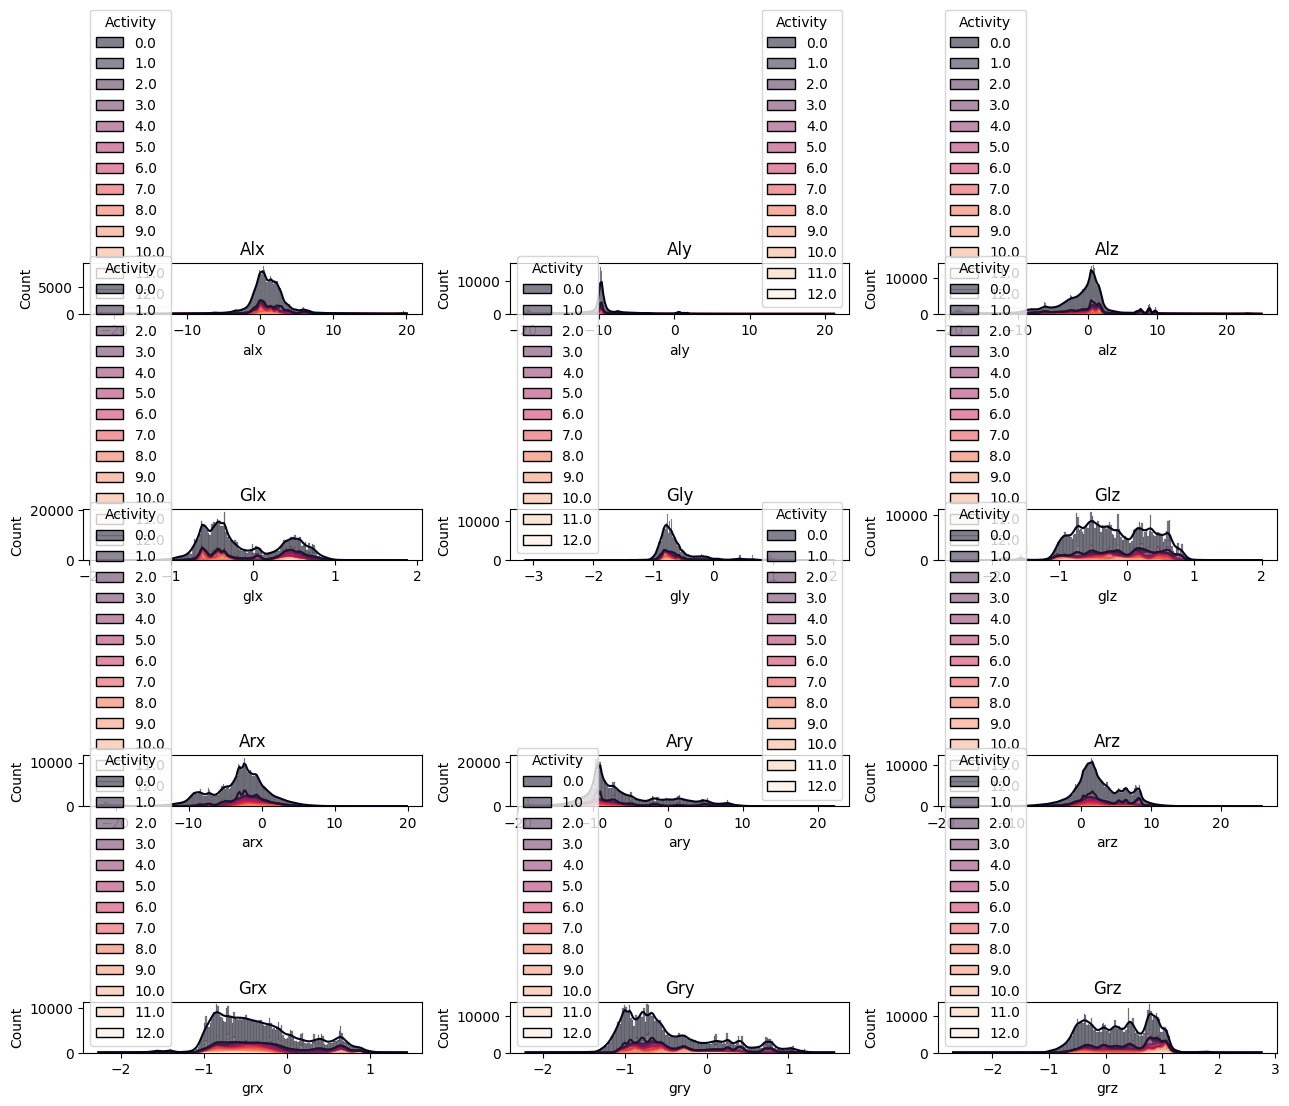

In [ ]:
 #distribution of each signal by activity
 signal_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz']

# Create a grid of subplots with 3 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(13, 10))

# Loop over each selected feature to create a subplot for each
for i, column in enumerate(signal_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'Activity' class
    sns.histplot(df, x=column, hue='Activity', kde=True, palette='rocket', ax=axs[x][y],
                 multiple='stack')
    axs[x][y].set_title(column.replace('_', ' ').title())

# Adjust the layout and display all the subplots
plt.tight_layout()
plt.show()

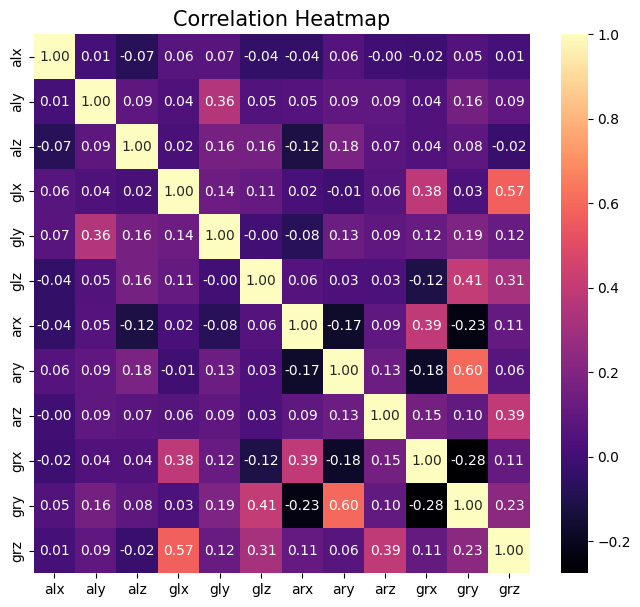

In [16]:
# For the correlation heatmap, we'll use only numerical columns.
# We'll update the list of numerical features to exclude columns with '_id' in their names.
numerical_features = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
'gry', 'grz']

# Recalculate the correlation matrix without the '_id' columns
correlation_matrix = df[numerical_features].corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

Data Engineering

Encoding Categorical Data

In [17]:
df['subject']=df['subject'].replace({'subject1':1, 'subject2':2,'subject3':3, 'subject4':4, 'subject5':5, 'subject6':6, 'subject7':7, 'subject8':8, 'subject9':9 })

In [18]:
df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,1


In [19]:
print(df['subject'].unique())

[1 2 3 4 5 6 7 8 9]


In [20]:
#Save copy of df until this point
df2= df.copy()

# Part I: Prediction of all Activity Classes

We drop subject 9 because it only has observations for few of the activity classes.

In [21]:
#Drop subject 9
df2= df2[df2['subject']!=9]
print(set(df2['subject']))

{1, 2, 3, 4, 5, 6, 7, 8}


The current size is too large for processing, so we decided to sample 100,000 observations from this dataset

In [22]:
df2_sample= df2.sample(n=100000, random_state=45)

Split Data into Training and Testing Sets

In [23]:
# Grouping by 'subject' and creating a list of dataframes, one per group
grouped = df2_sample.groupby('subject')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 70:30 ratio since there is a large imbalance
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.3, random_state=42)

# Reassembling the training and test datasets from the groups
train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

# Displaying the shape of the training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape

((60181, 14), (39819, 14))

In [24]:
print(train_df['subject'].unique())

[8 3 5 4 7]


In [25]:
print(test_df['subject'].unique())

[2 6 1]


In [26]:
dtype = train_df.dtypes
print(dtype)

alx         float64
aly         float64
alz         float64
glx         float64
gly         float64
glz         float64
arx         float64
ary         float64
arz         float64
grx         float64
gry         float64
grz         float64
Activity      int64
subject       int64
dtype: object


Normalization

In [27]:
# Identifying numerical columns (excluding 'Activity' and 'subject')
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Activity')
numerical_columns.remove('subject')

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
977517,0.381172,0.648782,-0.187036,-1.037546,-0.882223,-0.137830,1.246568,0.747730,-0.911529,-0.901107,1.802665,-1.667503,0,8
893311,0.310627,-0.416538,-0.030495,-0.819387,-0.993475,-0.008219,-0.204497,-0.105375,-0.121482,0.493934,-0.759745,-1.578825,4,8
867871,-0.025228,-0.024069,-0.336371,0.704058,0.691602,0.969147,-1.133959,0.575853,0.133043,0.101467,1.021241,0.923365,0,8
954154,0.385014,0.066241,-0.001969,-0.519872,-0.924588,0.818514,-0.992985,1.722188,-1.632790,-0.137576,2.746697,-1.424619,0,8
939766,-0.057438,0.625584,-1.595921,-0.834176,0.919444,-1.493507,0.778828,0.132884,1.419115,-0.579999,-0.870819,0.298792,0,8


In [28]:
train_df.shape

(60181, 14)

Addressing class imbalance

In [29]:
from sklearn.utils import resample

# Grouping the original training data by 'subject'
grouped_by_subject = train_df.groupby('subject')

#create a list of datasets by patient for each activity class
group_class_0=[]
group_class_1=[]
group_class_2=[]
group_class_3=[]
group_class_4=[]
group_class_5=[]
group_class_6=[]
group_class_7=[]
group_class_8=[]
group_class_9=[]
group_class_10=[]
group_class_11=[]
group_class_12=[]
group_class_13=[]
group_class_14=[]
group_class_15=[]
group_class_16=[]
for group in grouped_by_subject:
  group_class_0.append(group[1][group[1]['Activity']==0])
  group_class_1.append(group[1][group[1]['Activity']==1])
  group_class_2.append(group[1][group[1]['Activity']==2])
  group_class_3.append(group[1][group[1]['Activity']==3])
  group_class_4.append(group[1][group[1]['Activity']==4])
  group_class_5.append(group[1][group[1]['Activity']==5])
  group_class_6.append(group[1][group[1]['Activity']==6])
  group_class_7.append(group[1][group[1]['Activity']==7])
  group_class_8.append(group[1][group[1]['Activity']==8])
  group_class_9.append(group[1][group[1]['Activity']==9])
  group_class_10.append(group[1][group[1]['Activity']==10])
  group_class_11.append(group[1][group[1]['Activity']==11])
  group_class_12.append(group[1][group[1]['Activity']==12])

In [30]:
#Drop empty dataframes in class groups
list_groups= [group_class_1, group_class_2, group_class_3, group_class_4, group_class_5, group_class_6, group_class_7,
              group_class_8, group_class_9, group_class_10, group_class_10, group_class_11, group_class_12]
for group in list_groups:
  for i, g in enumerate(group):
    if len(g)==0:
      group.pop(i)

In [31]:
#Determmine Majority/Minority Classes Overall in the train dataset.
list_vals_activity= sorted(set(train_df['Activity']))
for val in list_vals_activity:
    print('class', val,len(train_df[train_df['Activity']== val]))


class 0 42887
class 1 1567
class 2 1548
class 3 1569
class 4 1499
class 5 1503
class 6 1435
class 7 1558
class 8 1478
class 9 1569
class 10 1487
class 11 1534
class 12 547


In [32]:
#Determmine Majority/Minority Classes by subject in the Train Dataset.
list_vals_activity= sorted(set(train_df['Activity']))
for s in sorted(set(train_df['subject'])):
  print('Subject', s)
  df_temp= train_df[train_df['subject']==s]
  for val in list_vals_activity:
    print('class', val,len(df_temp[df_temp['Activity']== val]))

Subject 3
class 0 8930
class 1 291
class 2 323
class 3 307
class 4 295
class 5 301
class 6 322
class 7 346
class 8 349
class 9 304
class 10 281
class 11 328
class 12 118
Subject 4
class 0 8334
class 1 324
class 2 276
class 3 322
class 4 332
class 5 300
class 6 327
class 7 324
class 8 299
class 9 302
class 10 281
class 11 303
class 12 106
Subject 5
class 0 8786
class 1 339
class 2 296
class 3 300
class 4 282
class 5 315
class 6 282
class 7 309
class 8 261
class 9 329
class 10 306
class 11 291
class 12 102
Subject 7
class 0 7180
class 1 301
class 2 338
class 3 303
class 4 308
class 5 292
class 6 318
class 7 265
class 8 310
class 9 310
class 10 306
class 11 308
class 12 113
Subject 8
class 0 9657
class 1 312
class 2 315
class 3 337
class 4 282
class 5 295
class 6 186
class 7 314
class 8 259
class 9 324
class 10 313
class 11 304
class 12 108


In [33]:
#Define function for creating oversampling minority groups. Use group_class_0 as reference.
def oversampling_groups(group_class):
  oversampled_groups_class=[]
  for i, g in enumerate(group_class):
    for e, c in enumerate(group_class_0):
      if i==e:
        resampled= resample(g, replace=True, n_samples= len(c), random_state=45)
        oversampled_groups_class.append(resampled)
  return oversampled_groups_class

In [35]:
# Apply oversampling function in each minority groups
oversampled_groups_class_1 = oversampling_groups(group_class_1)
oversampled_groups_class_2 = oversampling_groups(group_class_2)
oversampled_groups_class_3 = oversampling_groups(group_class_3)
oversampled_groups_class_4 = oversampling_groups(group_class_4)
oversampled_groups_class_5 = oversampling_groups(group_class_5)
oversampled_groups_class_6 = oversampling_groups(group_class_6)
oversampled_groups_class_7 = oversampling_groups(group_class_7)
oversampled_groups_class_8 = oversampling_groups(group_class_8)
oversampled_groups_class_9 = oversampling_groups(group_class_9)
oversampled_groups_class_10 = oversampling_groups(group_class_10)
oversampled_groups_class_11 = oversampling_groups(group_class_11)
oversampled_groups_class_12 = oversampling_groups(group_class_12)

In [36]:
# Importing tqdm for progress bar visualization in loops
from tqdm import tqdm
# Combining the oversampled minority class groups with the majority class group
# This results in a balanced dataset with an equal number of records for each class
balanced_groups = group_class_0 + oversampled_groups_class_1 + oversampled_groups_class_2 + oversampled_groups_class_3 + oversampled_groups_class_4 + oversampled_groups_class_5 + oversampled_groups_class_6 + oversampled_groups_class_7 + oversampled_groups_class_8 + oversampled_groups_class_9 + oversampled_groups_class_10 + oversampled_groups_class_11 + oversampled_groups_class_12

# Preparing to create a modified copy of the balanced dataset
balanced_groups_copy = []
i = 0
# Looping over each group in the balanced dataset
for i, group in tqdm(enumerate(balanced_groups)):
    # Assigning a new, unique identifier to each record in the group
    group.loc[:,'subject'] = i
    # Incrementing the identifier for the next group
    i += 1
    # Appending a copy of the modified group to the balanced_groups_copy list
    balanced_groups_copy.append(group.copy())

65it [00:00, 3529.74it/s]


In [37]:
# Reassembling the balanced training dataset
train_df_balanced = pd.concat(balanced_groups_copy, ignore_index=True)

# Checking the new class distribution in the balanced dataset
print(train_df_balanced.groupby('subject').apply(lambda x : x.iloc[:, -2:]['Activity']).value_counts())

0     42887
1     42887
2     42887
3     42887
4     42887
5     42887
6     42887
7     42887
8     42887
9     42887
10    42887
11    42887
12    42887
Name: Activity, dtype: int64


Sequencing

In [38]:
# Group by 'subject' and create sequences
grouped = train_df_balanced.groupby('subject', sort=False)
sequences = [group.drop(columns=['subject', 'Activity']).values for _, group in grouped]
targets = [group['Activity'] for _, group in grouped]  # Assuming all records for a patient have the same target

In [39]:
def create_sequences(train_df_balanced, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(train_df_balanced) - sequence_length + 1, sequence_length):
        sequence = train_df_balanced[i:i + sequence_length]
        # Assuming 'Activity' is the target variable and is the same for the entire sequence
        label = sequence['Activity'].iloc[0]
        sequences.append(sequence[numerical_columns].values)
        output.append(label)

    return np.array(sequences), np.array(output)

X_train = train_df_balanced.drop('Activity', axis = 1, inplace = False)
X_test = test_df.drop('Activity', axis = 1, inplace = False)

Y_train = train_df_balanced['Activity']
Y_test = test_df['Activity']

# Creating sequences for training and test data
X_train, Y_train = create_sequences(train_df_balanced, sequence_length=100)
X_test, Y_test = create_sequences(test_df, sequence_length=100)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((5575, 100, 12), (5575,), (398, 100, 12), (398,))

LSTM

Model fitting

Model 1: with activity 0

In [45]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 256
num_classes = 13
epochs = 50
learning_rate = 0.0001
batch_size = 128
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(Y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(Y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []
# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()
    true_labels_train = []
    predicted_labels_train = []
    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted_train = t.max(out.data, 1)
            true_labels_train.extend(Y.numpy())
            predicted_labels_train.extend(predicted_train.numpy())
            train_total += Y.size(0)
            train_correct += (predicted_train == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        true_labels_validation = []
        predicted_labels_validation = []
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted_validation = t.max(out.data, 1)
            true_labels_validation.extend(Y.numpy())
            predicted_labels_validation.extend(predicted_validation.numpy())
            validation_total += Y.size(0)
            validation_correct += (predicted_validation == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/50 ---> Train Accuracy: 34.062780269058294%, Validation Accuracy: 2.512562814070352%
Epoch 1/50 ---> Train Accuracy: 41.11210762331839%, Validation Accuracy: 1.256281407035176%
Epoch 2/50 ---> Train Accuracy: 47.946188340807176%, Validation Accuracy: 1.7587939698492463%
Epoch 3/50 ---> Train Accuracy: 59.228699551569505%, Validation Accuracy: 1.5075376884422111%
Epoch 4/50 ---> Train Accuracy: 62.582959641255606%, Validation Accuracy: 2.2613065326633164%
Epoch 5/50 ---> Train Accuracy: 63.10313901345292%, Validation Accuracy: 3.0150753768844223%
Epoch 6/50 ---> Train Accuracy: 68.5201793721973%, Validation Accuracy: 3.0150753768844223%
Epoch 7/50 ---> Train Accuracy: 66.45739910313901%, Validation Accuracy: 3.0150753768844223%
Epoch 8/50 ---> Train Accuracy: 71.24663677130044%, Validation Accuracy: 14.321608040201005%
Epoch 9/50 ---> Train Accuracy: 75.4798206278027%, Validation Accuracy: 16.834170854271356%
Epoch 10/50 ---> Train Accuracy: 79.17488789237669%, Validation Accura

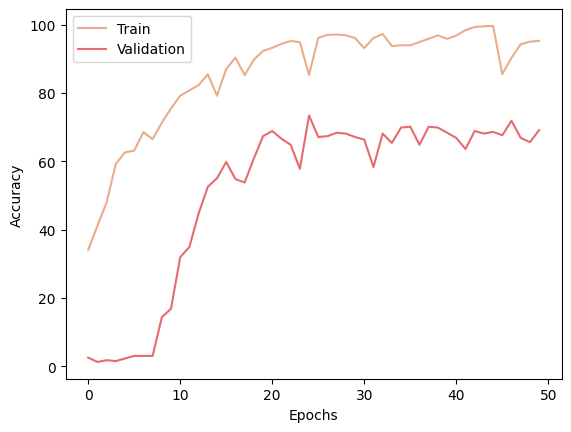

In [46]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

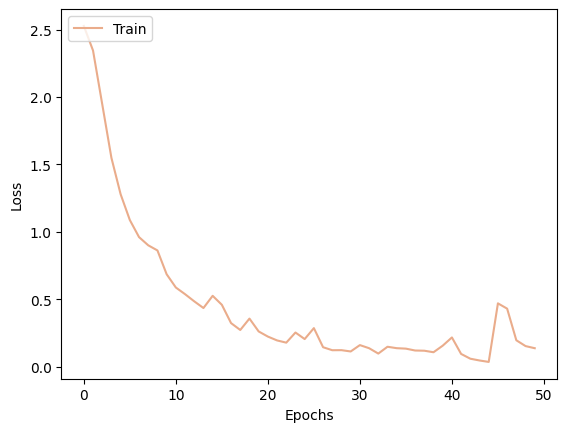

In [47]:
# Plot training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list, label="Train")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [48]:
# Evaluate the model predictive performance on the training set
conf_matrix = confusion_matrix(true_labels_train, predicted_labels_train)
class_report = classification_report(true_labels_train, predicted_labels_train)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[425   0   0   0   1   1   0   1   0   0   0   0   1]
 [  0 299   0   0   0   0 129   0   1   0   0   0   0]
 [  0   0 429   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 429   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 428   1   0   0   0   0   0   0   0]
 [  0   0   0   0   1 426   2   0   0   0   0   0   0]
 [  0 111   0   0   0   0 317   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0 428   0   0   0   0   0]
 [  0   0   0   0   1   0   4   0 424   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 429   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 429   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 428   1]
 [  2   0   0   0   4   0   1   0   0   0   0   1 420]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       429
           1       0.73      0.70      0.71       429
           2       1.00      1.00      1.00       429
           3       1.00  

In [49]:
# Evaluate the model predictive performance on the test (validation) set
conf_matrix = confusion_matrix(true_labels_validation, predicted_labels_validation)
class_report = classification_report(true_labels_validation, predicted_labels_validation)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[275   0   5   0   0   0   0   1   0   0   0   0  11]
 [ 12   0   0   0   0   0   0   0   0   0   0   0   2]
 [  9   0   0   0   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 10   0   0   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 13   0   0   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 14   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 12   0   0   0   0   0   0   0   0   0   0   0   0]
 [  6   0   1   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       292
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         9
           3       0.00  

# Part II: Prediction of Activity Classes Dropping Class 0 ('Nothing')

Given that Activity 0 signifies doing 'nothing,' which which is ambiguous and not very indicative, we decide to drop this category, as it may hinder the model's ability to predict other classes. In addition, as before, we also drop subject 9 because it only has observations for few of the activity classes.

In [ ]:
#Drop category 0
df= df[df['Activity']!=0]
print(set(df['Activity']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


In [ ]:
#Drop subject 9
df= df[df['subject']!=9]
print(set(df['subject']))

{1, 2, 3, 4, 5, 6, 7, 8}


Split Data into Training and Testing Sets

In [ ]:
# Grouping by 'subject' and creating a list of dataframes, one per group
grouped = df.groupby('subject')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 80:20 ratio
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.2, random_state=42)

# Reassembling the training and test datasets from the groups
train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

# Displaying the shape of the training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape

((207414, 14), (67737, 14))

In [ ]:
print(train_df['subject'].unique())

[1 8 3 5 4 7]


In [ ]:
print(test_df['subject'].unique())

[2 6]


In [ ]:
dtype = train_df.dtypes
print(dtype)

alx         float64
aly         float64
alz         float64
glx         float64
gly         float64
glz         float64
arx         float64
ary         float64
arz         float64
grx         float64
gry         float64
grz         float64
Activity      int64
subject       int64
dtype: object


Normalization

In [ ]:
# Identifying numerical columns (excluding 'Activity' and 'subject')
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Activity')
numerical_columns.remove('subject')

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
6656,0.243975,-0.069035,0.170485,-0.630257,-0.840154,-0.788474,0.041904,-0.485958,-0.126266,0.211671,-1.004809,-1.529028,1,1
6657,0.188259,-0.084214,0.174366,-0.630257,-0.840154,-0.788474,0.016937,-0.507858,-0.199173,0.211671,-1.004809,-1.529028,1,1
6658,0.181294,-0.097393,0.186745,-0.611071,-0.792613,-0.784992,0.035111,-0.506281,-0.191413,0.211671,-1.004809,-1.529028,1,1
6659,0.178742,-0.097509,0.178626,-0.611071,-0.792613,-0.784992,0.028452,-0.503233,-0.193707,0.177052,-1.004809,-1.520266,1,1
6660,0.166364,-0.086138,0.174147,-0.611071,-0.792613,-0.784992,0.033159,-0.507720,-0.176285,0.177052,-1.004809,-1.520266,1,1


In [ ]:
train_df.shape

(207414, 14)

Addressing class imbalance

In [ ]:
from sklearn.utils import resample

# Grouping the original training data by 'subject'
grouped_by_subject = train_df.groupby('subject')

#create a list of datasets by patient for each activity class
group_class_1=[]
group_class_2=[]
group_class_3=[]
group_class_4=[]
group_class_5=[]
group_class_6=[]
group_class_7=[]
group_class_8=[]
group_class_9=[]
group_class_10=[]
group_class_11=[]
group_class_12=[]
group_class_13=[]
group_class_14=[]
group_class_15=[]
group_class_16=[]
for group in grouped_by_subject:
  group_class_1.append(group[1][group[1]['Activity']==1])
  group_class_2.append(group[1][group[1]['Activity']==2])
  group_class_3.append(group[1][group[1]['Activity']==3])
  group_class_4.append(group[1][group[1]['Activity']==4])
  group_class_5.append(group[1][group[1]['Activity']==5])
  group_class_6.append(group[1][group[1]['Activity']==6])
  group_class_7.append(group[1][group[1]['Activity']==7])
  group_class_8.append(group[1][group[1]['Activity']==8])
  group_class_9.append(group[1][group[1]['Activity']==9])
  group_class_10.append(group[1][group[1]['Activity']==10])
  group_class_11.append(group[1][group[1]['Activity']==11])
  group_class_12.append(group[1][group[1]['Activity']==12])

In [ ]:
#Drop empty dataframes in class groups
list_groups= [group_class_1, group_class_2, group_class_3, group_class_4, group_class_5, group_class_6, group_class_7,
              group_class_8, group_class_9, group_class_10, group_class_10, group_class_11, group_class_12]
for group in list_groups:
  for i, g in enumerate(group):
    if len(g)==0:
      group.pop(i)

In [ ]:
#Determmine Majority/Minority Classes Overall in the train dataset.
list_vals_activity= sorted(set(train_df['Activity']))
for val in list_vals_activity:
    print('class', val,len(train_df[train_df['Activity']== val]))


class 1 18432
class 2 18432
class 3 18432
class 4 18432
class 5 18432
class 6 17614
class 7 18382
class 8 17767
class 9 18432
class 10 18432
class 11 18432
class 12 6195


In [ ]:
#Determmine Majority/Minority Classes by subject in the Train Dataset.
list_vals_activity= sorted(set(train_df['Activity']))
for s in sorted(set(train_df['subject'])):
  print('Subject', s)
  df_temp= train_df[train_df['subject']==s]
  for val in list_vals_activity:
    print('class', val,len(df_temp[df_temp['Activity']== val]))

Subject 1
class 1 3072
class 2 3072
class 3 3072
class 4 3072
class 5 3072
class 6 3072
class 7 3072
class 8 3379
class 9 3072
class 10 3072
class 11 3072
class 12 1075
Subject 3
class 1 3072
class 2 3072
class 3 3072
class 4 3072
class 5 3072
class 6 3226
class 7 3379
class 8 3175
class 9 3072
class 10 3072
class 11 3072
class 12 1024
Subject 4
class 1 3072
class 2 3072
class 3 3072
class 4 3072
class 5 3072
class 6 3328
class 7 3277
class 8 3123
class 9 3072
class 10 3072
class 11 3072
class 12 1024
Subject 5
class 1 3072
class 2 3072
class 3 3072
class 4 3072
class 5 3072
class 6 2765
class 7 2868
class 8 2714
class 9 3072
class 10 3072
class 11 3072
class 12 1024
Subject 7
class 1 3072
class 2 3072
class 3 3072
class 4 3072
class 5 3072
class 6 3072
class 7 2765
class 8 2816
class 9 3072
class 10 3072
class 11 3072
class 12 1024
Subject 8
class 1 3072
class 2 3072
class 3 3072
class 4 3072
class 5 3072
class 6 2151
class 7 3021
class 8 2560
class 9 3072
class 10 3072
class 11 3072


In [ ]:
#Define function for creating oversampling minority groups. Use group_class_1 as reference.
def oversampling_groups(group_class):
  oversampled_groups_class=[]
  for i, g in enumerate(group_class):
    for e, c in enumerate(group_class_1):
      if i==e:
        resampled= resample(g, replace=True, n_samples= len(c), random_state=45)
        oversampled_groups_class.append(resampled)
  return oversampled_groups_class

In [ ]:
# Apply oversampling function in each minority groups
oversampled_groups_class_2 = oversampling_groups(group_class_2)
oversampled_groups_class_3 = oversampling_groups(group_class_3)
oversampled_groups_class_4 = oversampling_groups(group_class_4)
oversampled_groups_class_5 = oversampling_groups(group_class_5)
oversampled_groups_class_6 = oversampling_groups(group_class_6)
oversampled_groups_class_7 = oversampling_groups(group_class_7)
oversampled_groups_class_8 = oversampling_groups(group_class_8)
oversampled_groups_class_9 = oversampling_groups(group_class_9)
oversampled_groups_class_10 = oversampling_groups(group_class_10)
oversampled_groups_class_11 = oversampling_groups(group_class_11)
oversampled_groups_class_12 = oversampling_groups(group_class_12)

In [ ]:
# Importing tqdm for progress bar visualization in loops
from tqdm import tqdm
# Combining the oversampled minority class groups with the majority class group
# This results in a balanced dataset with an equal number of records for each class
balanced_groups = group_class_1 + oversampled_groups_class_2 + oversampled_groups_class_3 + oversampled_groups_class_4 + oversampled_groups_class_5 + oversampled_groups_class_6 + oversampled_groups_class_7 + oversampled_groups_class_8 + oversampled_groups_class_9 + oversampled_groups_class_10 + oversampled_groups_class_11 + oversampled_groups_class_12

# Preparing to create a modified copy of the balanced dataset
balanced_groups_copy = []
i = 0
# Looping over each group in the balanced dataset
for i, group in tqdm(enumerate(balanced_groups)):
    # Assigning a new, unique identifier to each record in the group
    group.loc[:,'subject'] = i
    # Incrementing the identifier for the next group
    i += 1
    # Appending a copy of the modified group to the balanced_groups_copy list
    balanced_groups_copy.append(group.copy())

72it [00:00, 2898.31it/s]


In [ ]:
# Reassembling the balanced training dataset
train_df_balanced = pd.concat(balanced_groups_copy, ignore_index=True)

# Checking the new class distribution in the balanced dataset
print(train_df_balanced.groupby('subject').apply(lambda x : x.iloc[:, -2:]['Activity']).value_counts())

1     18432
2     18432
3     18432
4     18432
5     18432
6     18432
7     18432
8     18432
9     18432
10    18432
11    18432
12    18432
Name: Activity, dtype: int64


Sequencing

In [ ]:
# Group by 'subject' and create sequences
grouped = train_df_balanced.groupby('subject', sort=False)
sequences = [group.drop(columns=['subject', 'Activity']).values for _, group in grouped]
targets = [group['Activity'] for _, group in grouped]  # Assuming all records for a patient have the same target

In [ ]:
def create_sequences(train_df_balanced, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(train_df_balanced) - sequence_length + 1, sequence_length):
        sequence = train_df_balanced[i:i + sequence_length]
        # Assuming 'Activity' is the target variable and is the same for the entire sequence
        label = sequence['Activity'].iloc[0]
        sequences.append(sequence[numerical_columns].values)
        output.append(label)

    return np.array(sequences), np.array(output)

X_train = train_df_balanced.drop('Activity', axis = 1, inplace = False)
X_test = test_df.drop('Activity', axis = 1, inplace = False)

Y_train = train_df_balanced['Activity']
Y_test = test_df['Activity']

# Creating sequences for training and test data
X_train, Y_train = create_sequences(train_df_balanced, sequence_length=100)
X_test, Y_test = create_sequences(test_df, sequence_length=100)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((2211, 100, 12), (2211,), (677, 100, 12), (677,))

Model fitting

LSTM Model 2

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 256
num_classes = 13
epochs = 100
learning_rate = 0.0001
batch_size = 128
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(Y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(Y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []
# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()
    true_labels_train = []
    predicted_labels_train = []
    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted_train = t.max(out.data, 1)
            true_labels_train.extend(Y.numpy())
            predicted_labels_train.extend(predicted_train.numpy())
            train_total += Y.size(0)
            train_correct += (predicted_train == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        true_labels_validation = []
        predicted_labels_validation = []
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted_validation = t.max(out.data, 1)
            true_labels_validation.extend(Y.numpy())
            predicted_labels_validation.extend(predicted_validation.numpy())
            validation_total += Y.size(0)
            validation_correct += (predicted_validation == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/100 ---> Train Accuracy: 20.126639529624605%, Validation Accuracy: 19.054652880354507%
Epoch 1/100 ---> Train Accuracy: 28.584350972410675%, Validation Accuracy: 23.190546528803544%
Epoch 2/100 ---> Train Accuracy: 34.55450022614202%, Validation Accuracy: 26.73559822747415%
Epoch 3/100 ---> Train Accuracy: 36.90637720488467%, Validation Accuracy: 25.258493353028065%
Epoch 4/100 ---> Train Accuracy: 41.97195838986884%, Validation Accuracy: 29.68980797636632%
Epoch 5/100 ---> Train Accuracy: 46.44957033016735%, Validation Accuracy: 34.26883308714919%
Epoch 6/100 ---> Train Accuracy: 43.23835368611488%, Validation Accuracy: 27.031019202363368%
Epoch 7/100 ---> Train Accuracy: 53.5052012663953%, Validation Accuracy: 39.14327917282127%
Epoch 8/100 ---> Train Accuracy: 53.73134328358209%, Validation Accuracy: 38.25701624815362%
Epoch 9/100 ---> Train Accuracy: 51.243781094527364%, Validation Accuracy: 39.14327917282127%
Epoch 10/100 ---> Train Accuracy: 53.143374038896425%, Validatio

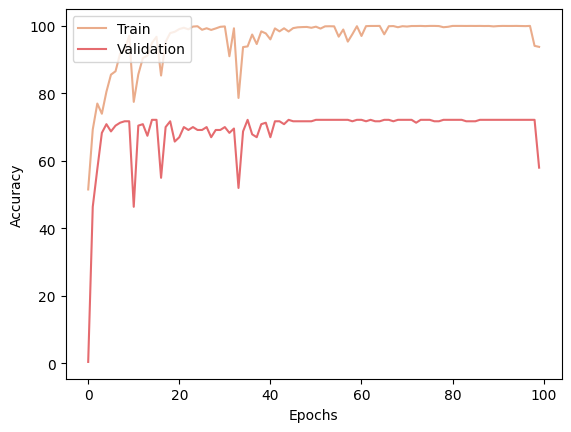

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

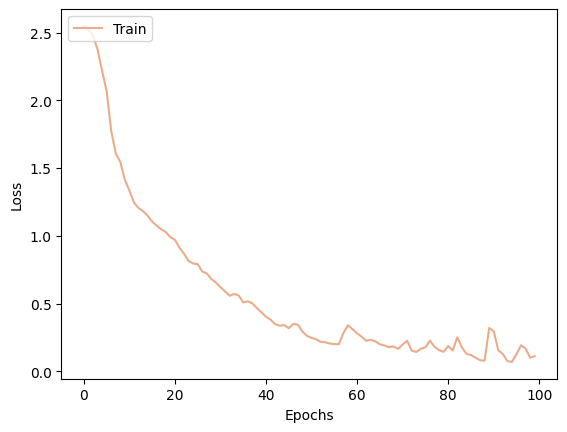

In [ ]:
# Plot training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list, label="Train")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Evaluate the model predictive performance on the training set
conf_matrix = confusion_matrix(true_labels_train, predicted_labels_train)
class_report = classification_report(true_labels_train, predicted_labels_train)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[180   0   0   0   0   5   0   0   0   0   0   0]
 [  0 184   0   0   0   0   0   0   0   0   0   0]
 [  0   0 184   0   0   0   0   0   0   0   0   0]
 [  0   0   0 158  27   0   0   0   0   0   0   0]
 [  0   1   0   8 175   0   0   0   0   0   0   0]
 [  0   0   0   0   0 184   0   0   0   0   0   0]
 [  0   0   0   0   0   0 184   0   0   0   0   1]
 [  0   0   0   0   7   0   0 177   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184   0   0   0]
 [  0   0   0   0   0   0   0   0   0 185   0   0]
 [  0   0   0   0   0   0   0   0   0   0 184   0]
 [  0   1   0   0   0   0   0   0   0   0   0 182]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.99       185
           2       0.99      1.00      0.99       184
           3       1.00      1.00      1.00       184
           4       0.95      0.85      0.90       185
           5       0.84      0.95      0.89       184
           6       0

In [ ]:
# Evaluate the model predictive performance on the test (validation) set
conf_matrix = confusion_matrix(true_labels_validation, predicted_labels_validation)
class_report = classification_report(true_labels_validation, predicted_labels_validation)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[30  1  0 30  0  0  0  0  0  0  0  1]
 [ 0 30  0  0  0  0  1  0  0  0  0 30]
 [ 0  0 31  0  0  0 30  0  0  0  0  0]
 [11  0  0 26 25  0  0  0  0  0  0  0]
 [ 6  3  3 10 17  2  0 17  0  0  0  3]
 [23  0  0 13  0  6  0 10  0  0  0  2]
 [ 0  4  0  0  0  0 29  0  0  0  0 21]
 [11  0  0 15  1  2  0 28  0  0  0  0]
 [ 0 19  0  0 11  0  0  0 31  0  0  0]
 [ 0  0  0  2  0  0  0  1  0  6 53  0]
 [ 0  1  0 25  3  0  0  4  0  2 27  0]
 [ 0  1  0  0  0  0  0  1  0  3  0 15]]

Classification Report:
              precision    recall  f1-score   support

           1       0.37      0.48      0.42        62
           2       0.51      0.49      0.50        61
           3       0.91      0.51      0.65        61
           4       0.21      0.42      0.28        62
           5       0.30      0.28      0.29        61
           6       0.60      0.11      0.19        54
           7       0.48      0.54      0.51        54
           8       0.46      0.49      0.47        57
  